# 1. Business Problem

## 1.1 Description

Source - The dataset is of the Telecom comapny that provides micro credit to the customer

Problem Statement - To predict that whether customer is payback the loan in limited number of days which is 5 days 

 <h1>2. Machine Learning Problem Formulation</h1>

2.1 Data

2.1.1 Data Overview

We have 2 raw data files 
**sample_data_intw.csv** –  This file contains all the activity of the customer such as
1. Balance
2. Loan amount
3. No of days he can pay the loan
4. Balnace they have when recharging another one and etc

And these information availabale in different ways such as

Mean, Count and Median of 30 and 90 days 

**Data_Description.csv** - This file is just for description of dataset present in sample_data_intw.csv




<h2>2.2. Mapping the  problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

To predict whether the customer is able to pay the loan or not in 5 days of period

<h3>2.2.2. Performance Metric</h3>

Metric(s): 
* We will use confusion metric to get accuracy of this binary classification problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")
from sklearn import model_selection
import xgboost as xg
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lets first fetch the dataset for exploring it 

In [3]:
customer_data = pd.read_csv('/content/drive/My Drive/Case Study Algo8/sample_data_intw.csv')


In [4]:
print('Number of data points : ', customer_data.shape[0])
print('Number of features : ', customer_data.shape[1])
print('Features : ', customer_data.columns.values)
customer_data.head()

Number of data points :  209593
Number of features :  37
Features :  ['Unnamed: 0' 'label' 'msisdn' 'aon' 'daily_decr30' 'daily_decr90'
 'rental30' 'rental90' 'last_rech_date_ma' 'last_rech_date_da'
 'last_rech_amt_ma' 'cnt_ma_rech30' 'fr_ma_rech30' 'sumamnt_ma_rech30'
 'medianamnt_ma_rech30' 'medianmarechprebal30' 'cnt_ma_rech90'
 'fr_ma_rech90' 'sumamnt_ma_rech90' 'medianamnt_ma_rech90'
 'medianmarechprebal90' 'cnt_da_rech30' 'fr_da_rech30' 'cnt_da_rech90'
 'fr_da_rech90' 'cnt_loans30' 'amnt_loans30' 'maxamnt_loans30'
 'medianamnt_loans30' 'cnt_loans90' 'amnt_loans90' 'maxamnt_loans90'
 'medianamnt_loans90' 'payback30' 'payback90' 'pcircle' 'pdate']


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


So we have in total 37 features and 209593 data points. Let's try to dig deep to get better intuition about the data

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

By this we can say that all the features are in required data type except pdate and pcircle which should be datetime and categorical data type. Also we do not have any null values. But let first confirm it

In [50]:
#Checking whether there are any rows with null values
nan_rows = customer_data[customer_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Unnamed: 0, label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pcircle, pdate]
Index: []


By this it is clear that there is no null values so it is not needed to impute null values

# <h1>EDA</h1>

Univariate and Bivariate Analysis

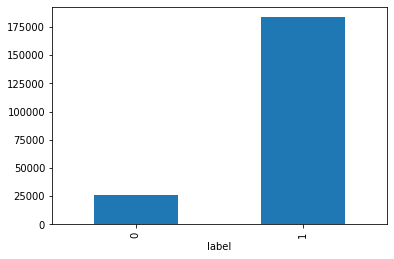

In [7]:
customer_data.groupby("label")['Unnamed: 0'].count().plot.bar()

In [8]:
print('~> Customer not able to pay loan   {}%'.format(round(100 - customer_data['label'].mean()*100, 2)))
print('\n~> Customer able to pay loan   {}%'.format(round(customer_data['label'].mean()*100, 2)))

~> Customer not able to pay loan   12.48%

~> Customer able to pay loan   87.52%


It is unbalanced data which we can tackel by taking stratify strategy if we are taking train and test dataset 


In [9]:
msisdn_list = pd.Series(customer_data['msisdn'].tolist())
unique_msisdn = len(np.unique(msisdn_list))
msisdn_list_1 = np.sum(msisdn_list.value_counts() > 1)
print ('Total number of  Unique Customers are: {}\n'.format(unique_msisdn))

print ('Number of unique Customers that appear more than one time: {} ({}%)\n'.format(msisdn_list_1,msisdn_list_1/unique_msisdn*100))

print ('Max number of times a single Customer is repeated: {}\n'.format(max(msisdn_list.value_counts()))) 

msisdn_value=msisdn_list.value_counts()

msisdn_value=msisdn_value.values

Total number of  Unique Customers are: 186243

Number of unique Customers that appear more than one time: 19756 (10.607646998813378%)

Max number of times a single Customer is repeated: 7



Lets first take customer loyalty to the company means from how long customer is linked with the company

In [10]:
avg_days = pd.DataFrame(customer_data.groupby("label")["aon"].apply(np.mean)).reset_index()
avg_days.columns = ['label', 'avg_days_to_use']

avg_days.sort_values(by=['avg_days_to_use'], inplace=True)
print(avg_days.head(5))


   label  avg_days_to_use
1      1      8004.139590
0      0      8870.998799


If I convert to year then we will get around 22 years so lets check it more to confirm is there any outliers

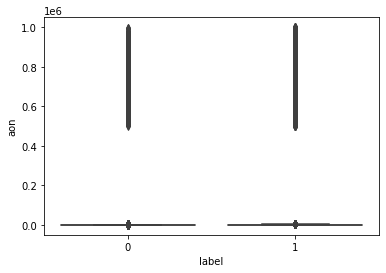

In [11]:
sns.boxplot(x='label',y='aon', data=customer_data)
plt.show()

In [12]:
z = np.abs(stats.zscore(customer_data['aon']))
print(z[z>3])

[12.17448328 11.26663139  9.10950899 ... 10.50609423  7.57403143
 10.61839556]


So we can see that there some outliers in this column we will remove this in data after looking at different columns


In [13]:
customer_data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Bar Analysis function will give overview of the dataset that how data is linked with the target variable which is label

In [14]:
def bar_analysis(df,column2):
  
  avg_days = pd.DataFrame(df.groupby("label")[column2].apply(np.mean)).reset_index()
  avg_days.columns = ['label', column2]
  avg_days.sort_values(by=[column2], inplace=True) 

  figure = plt.figure(figsize=(8,6)) 
  item_plot = sns.barplot(x="label", y=column2, data=avg_days)
  item_plot.set(xlabel="Label", ylabel = column2)

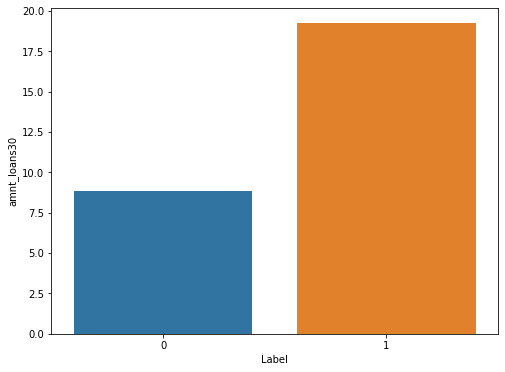

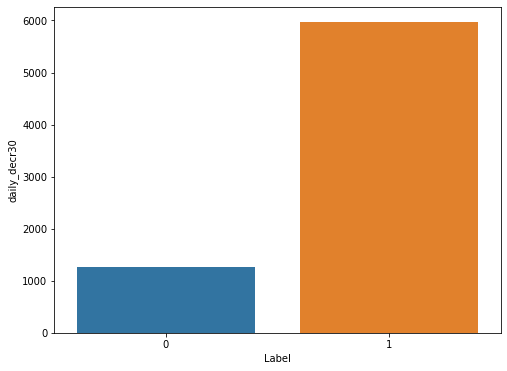

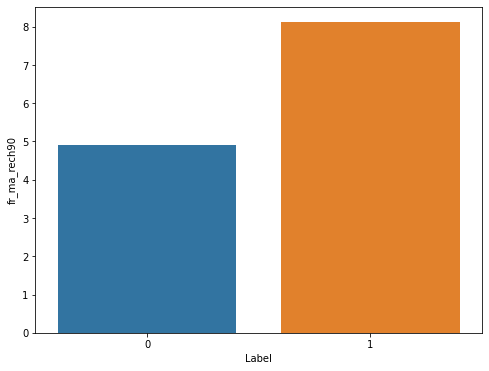

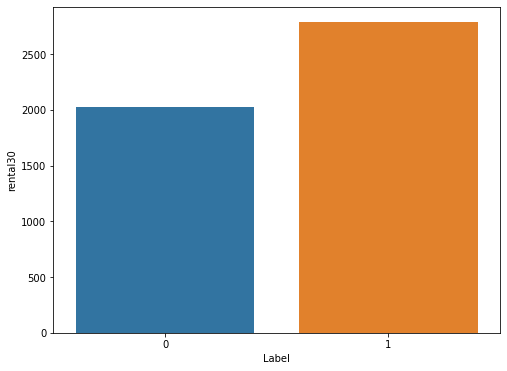

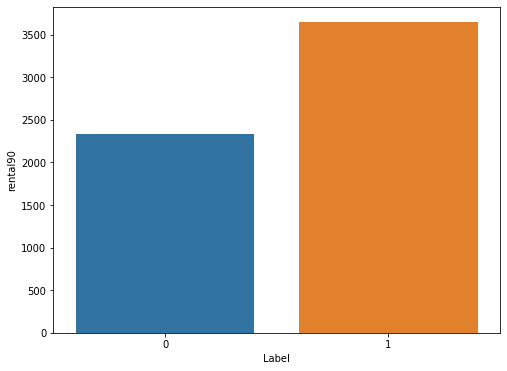

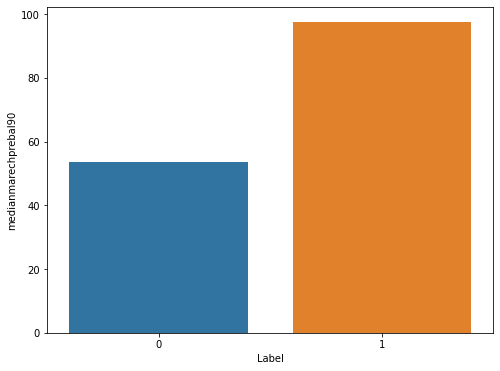

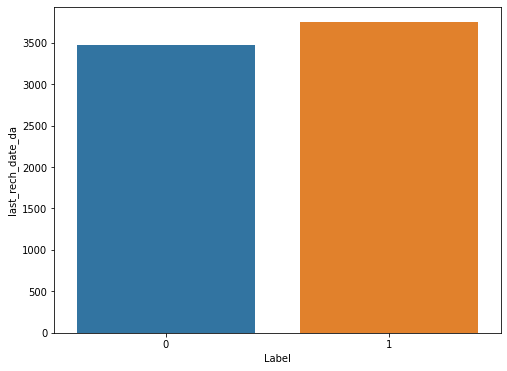

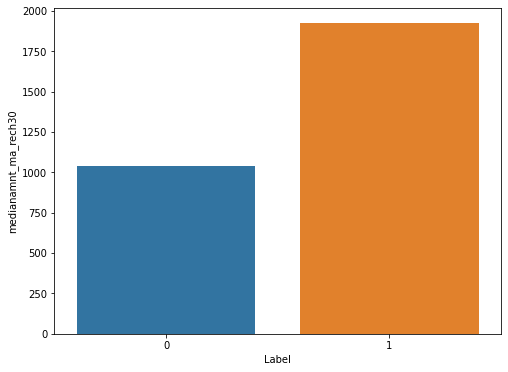

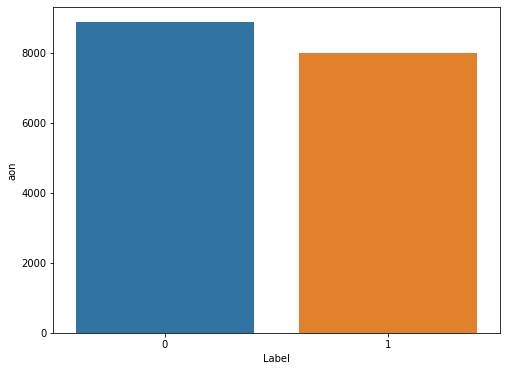

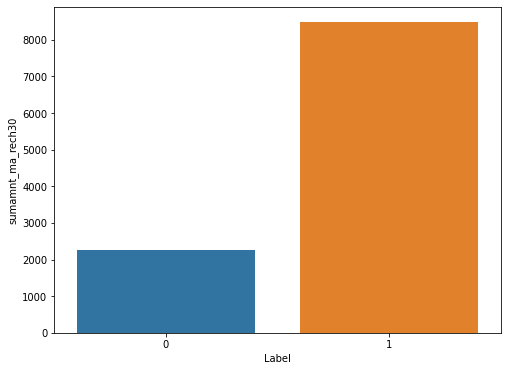

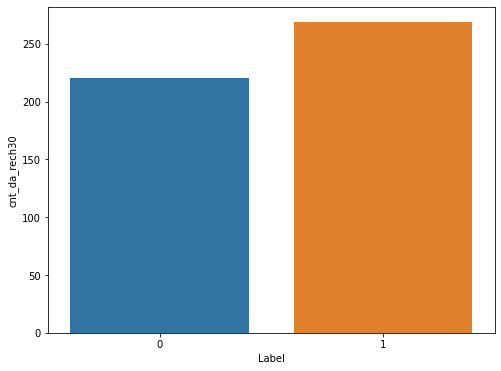

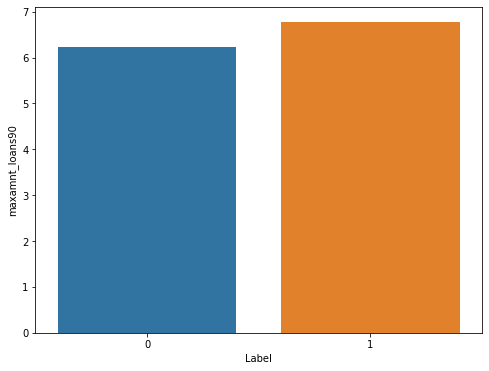

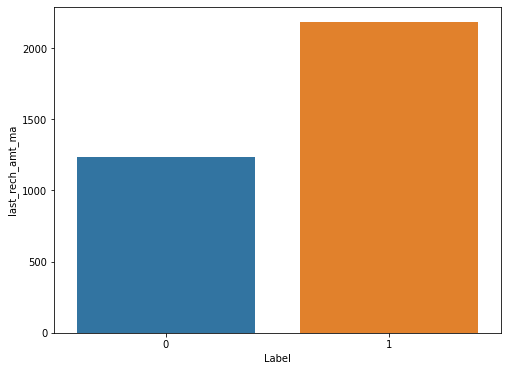

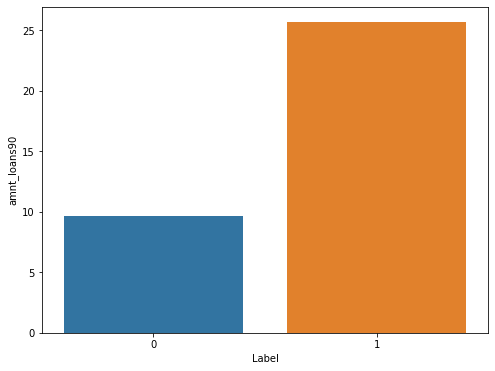

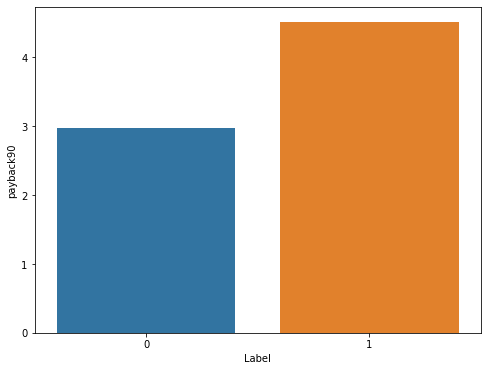

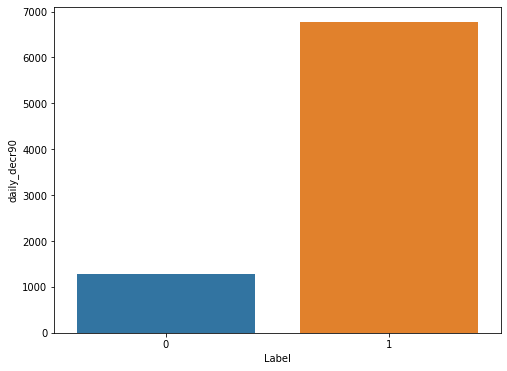

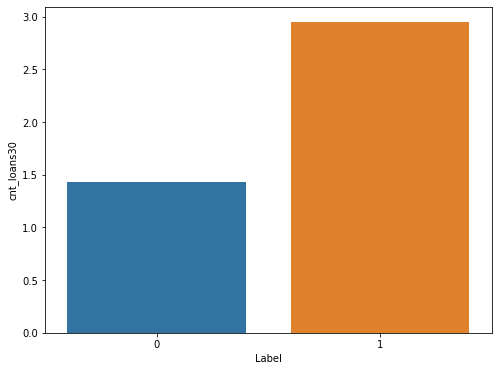

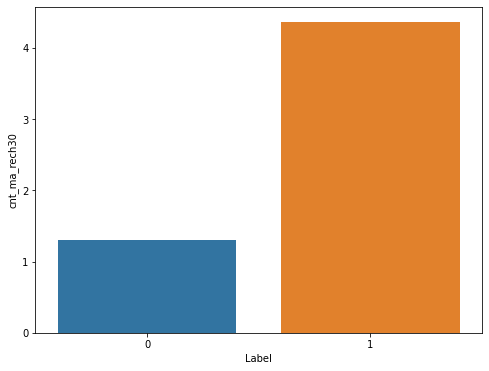

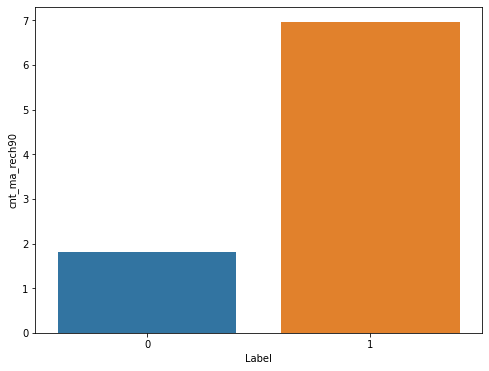

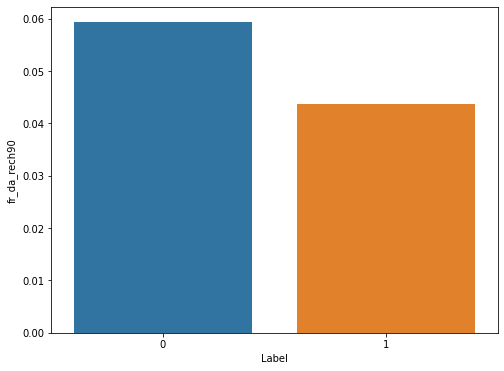

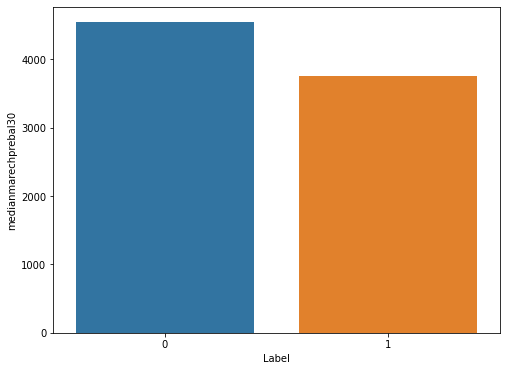

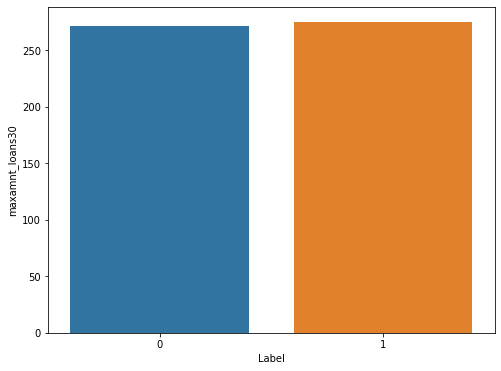

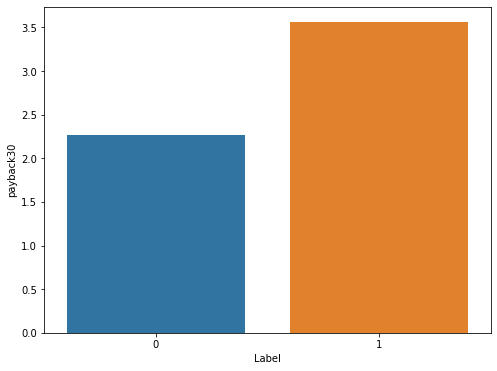

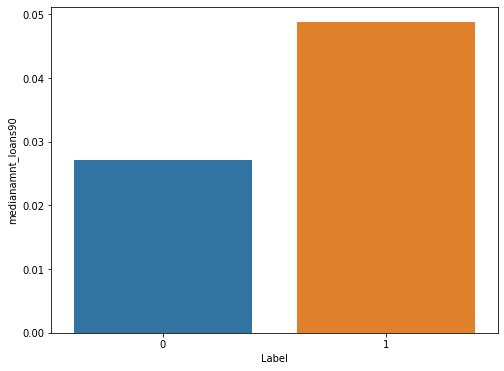

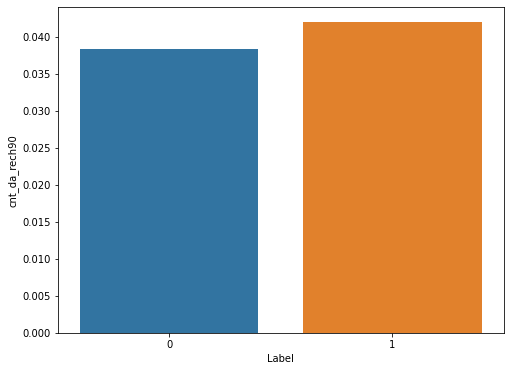

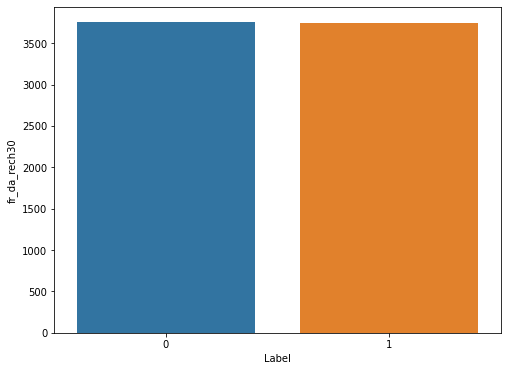

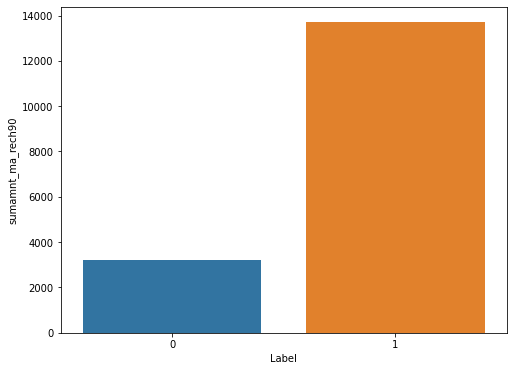

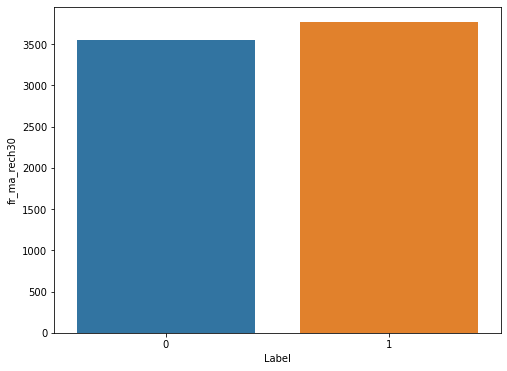

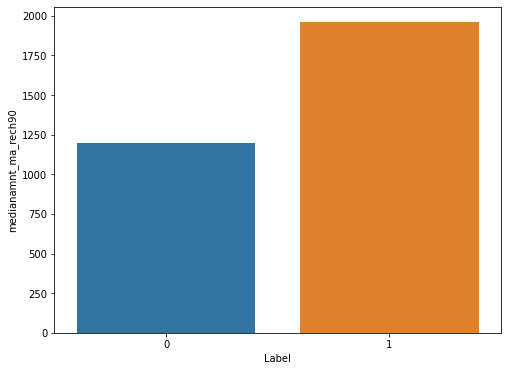

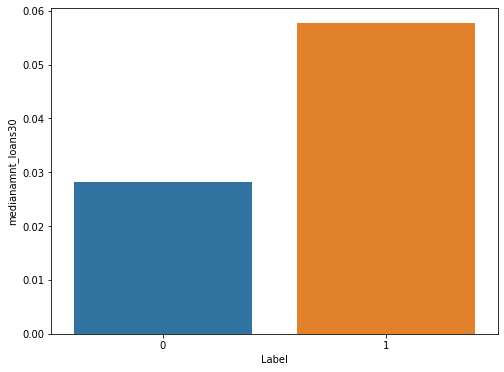

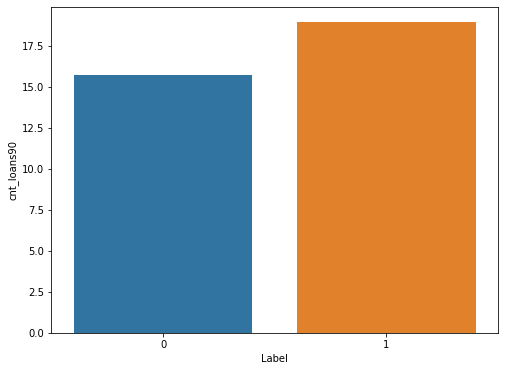

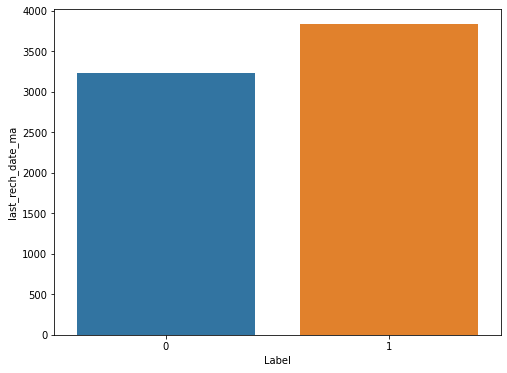

In [15]:
numerical_column_eda = list(set(customer_data.columns) - (set(['Unnamed: 0','label','pdate','pcircle','msisdn'])))

for i in numerical_column_eda:
  bar_analysis(customer_data,i)

**Observations**

So by these bar graphs we get that which has effect on finding our target variable 

1.   **daily_decr30 & daily_decr90** - Since label 1 is high which means that customer who can payback the loan because of some reason(which we can dig out later) spent higher on avegrage then who cannot payback the loan. *It is required to pay attention to the customer who are spending less *

1.   **rental30 & rental90** - if we see both graphs then we get that avg balance for label 0 is less than label 1 which means that customer who cannot payback the loan have less balance. So by this we can track those customer who have less balance and notify them for their pending loan

1.   **last_rech_date_ma & last_rech_date_da** - In this we see that count of last recharge days to main as well as data account is almost same the difference maybe because of unbalanced data as this is the total count

1.   **last_rech_amt_ma** - Customer who can repay the loan are recharging more then customer who not able to repay the loan. So we have track those customers who are not recharging

2.   **fr_ma_rech30 & fr_ma_rech90** - Customer can able to pay the loan are having more frequency of recharging then who do not able to pay the loan

2.   **sumamnt_ma_rech30 & medianamnt_ma_rech30 & sumamnt_ma_rech90 & medianamnt_ma_rech90** - This also gives intuition that customer who can repay the loan are taking more sum of reacharge which shows that those people are not taking enough recharge then they might not able to pay the loan. So by this it is required to pay attention to the customer who are taking less sum of recharge in last 30 or 90 days .

2.   **medianmarechprebal30** - This is interesting that customer who not able to pay the loan are having more amount when recharging the second one. This is to be drill down more to know is this affected by *outliers*

2.   **cnt_ma_rech30 & cnt_ma_rech90** - Customer who are taking less no of recharge are not able to pay the loan the who are taking more recharge. Company have to track down those customers who are not recharging in last 30 or 90 days

1.   **medianmarechprebal90** - By this we get to know in 90 days period customer are able to pay the loan are having more balance then those having not able to pay the loan.So if we compare it with *medianmarechprebal30* we get that medianmarechprebal30 having ouliers.

1.   **fr_da_rech30 & fr_da_rech90** - Customer who not able to pay the loan are recharging data with higher frequency then who can able to pay. So this gives that in data perspective we see higher frequency then main account balance for customer who not able to pay the loan

2.   **cnt_loans30 & cnt_loans90** -  Customer who are taking less no of loans are not able to pay the loan

1.   **amnt_loans30 & amnt_loans90 & medianamnt_loans30** - We can say that people that can payback the loan are taking more amount of loan then people who can't pay the loan. So business have to focus on customer who are taking less amount of loan

2.   **maxamnt_loans30** - Since it should have value only 6 and 12 but according to graph it showing huge values so it is having some outliers 

2.   **maxamnt_loans90** - Customer who can't able to pay the loan are taking loan of 6 Rupiah whole who are able to pay the loan are taking more 12 Rupiah loan

1.   **medianamnt_loans90** - By this we can get that customer who can repay the loan are taking higher amount of loans as we get in above parameters

2.   **payback30 & payback90** - It is observed that customer who take time to repay the loan are able to pay the loan. But not enoogh proof for that we can dig out it later
   


**Conclusion**

So from the above observation we can conclude -

1.   It is required to pay attention to the customer who are spending less.

2.   Company have to track those customer who have less balance and notify them for their pending loan

1.   It is required to pay attention to the customer who are taking less sum of amount of recharge in last 30 or 90 day 
2.   We also have to provide better alternative of loan amount because customer who not able to pay are taking low amount of loan amount.

1.   Few features have outliers so we have to check outliers for all
2.   It is also seen that many features have same effect on the target variable which results into correlation so we have to check correlation also







In [16]:
customer_data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

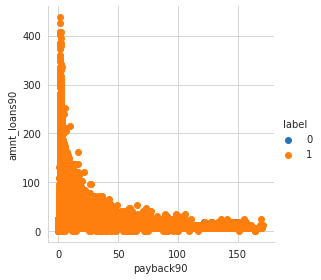

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(customer_data, hue="label", size=4) \
   .map(plt.scatter, "payback90", "amnt_loans90") \
   .add_legend();
plt.show();

So our intuition is right that it as loan amount decreases it will take more days to repay the loan. So customer who are having less loan amount should get notified to repay the loan.


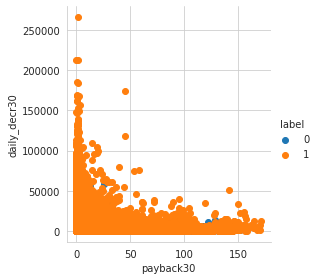

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(customer_data, hue="label", size=4) \
   .map(plt.scatter, "payback30","daily_decr30") \
   .add_legend();
plt.show();

So by this graph we can say that customer pay loan more often if they spent less on daily basis. So company will try to track customer daily spends and warn if they get below threshold value

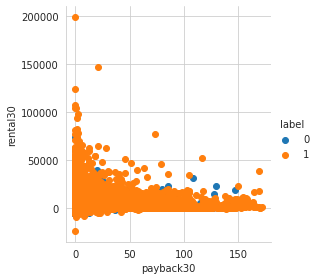

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(customer_data, hue="label", size=4) \
   .map(plt.scatter, "payback30", "rental30") \
   .add_legend();
plt.show();

So customer having more amount balance are likely to pay fastly. So it can be done that company should take a watch on customer balance and give alarm signal if it gets below threshold value

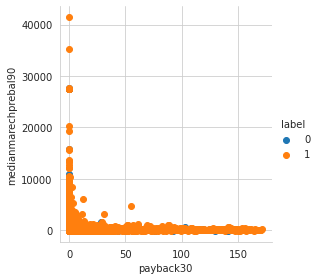

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(customer_data, hue="label", size=4) \
   .map(plt.scatter, "payback30", "medianmarechprebal90") \
   .add_legend();
plt.show();

By this we get that customer will get payback more fastly when he is having enough balance. So if customer is not having enough balance and he is recharging again then he might not able to payback the loan timely

So by these plots we just confirm out analysis that we done from bar chart.

Lets now come to outliers which we leave in the starting. We will check each column as they are not many to get proper result

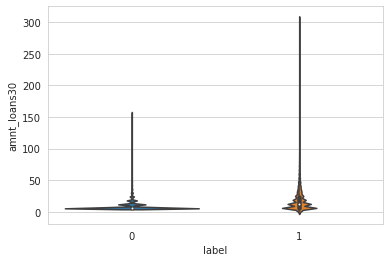

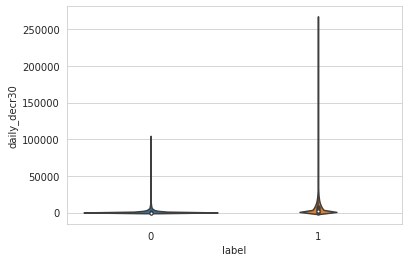

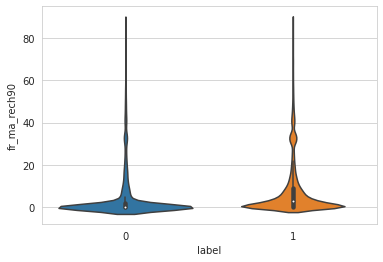

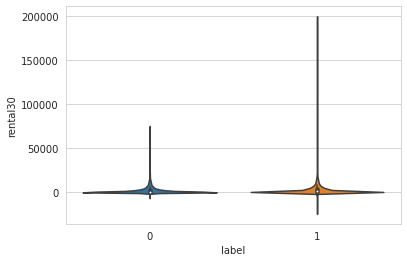

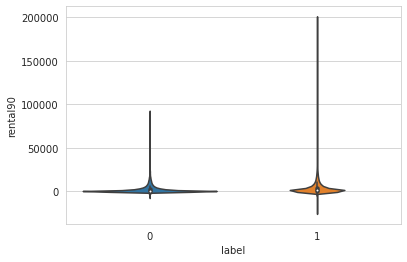

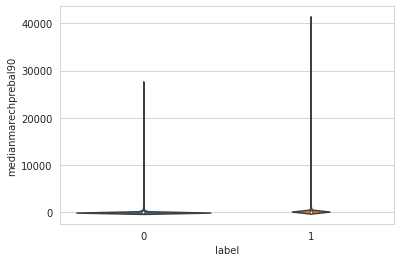

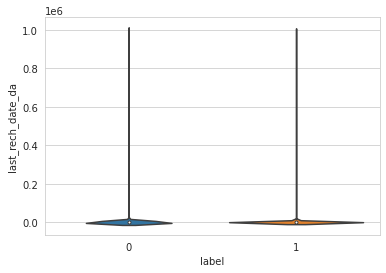

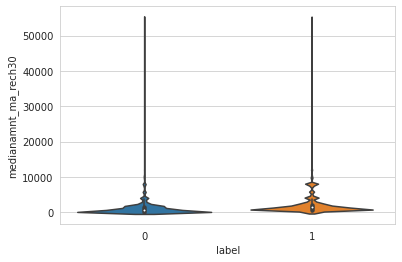

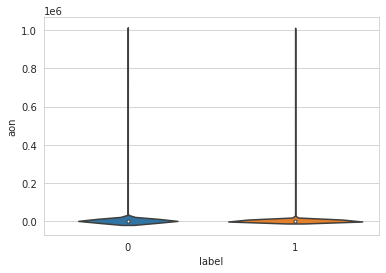

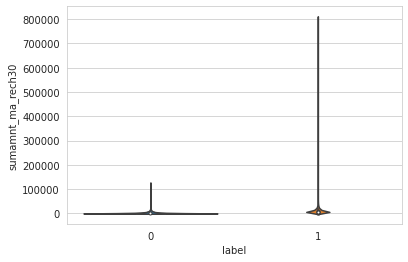

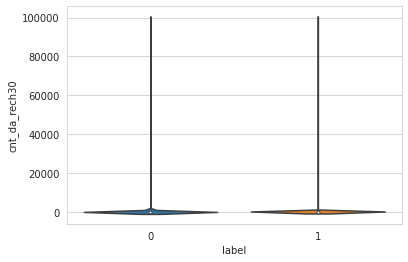

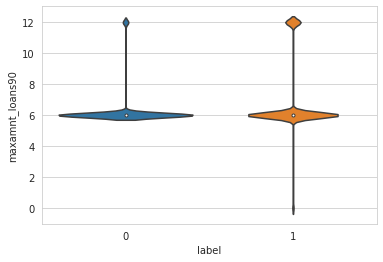

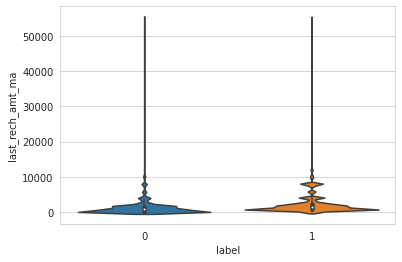

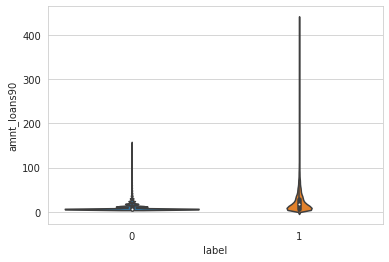

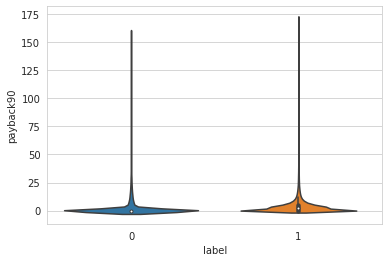

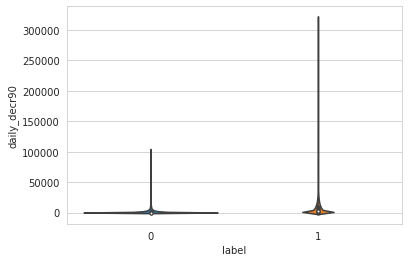

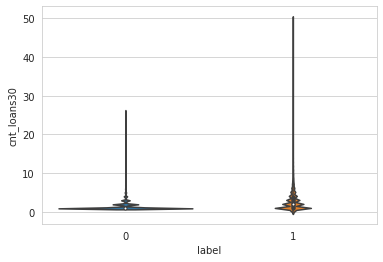

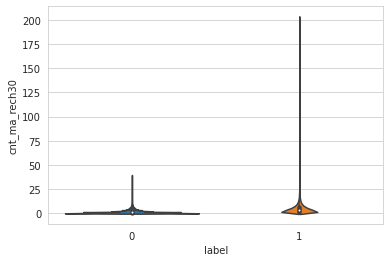

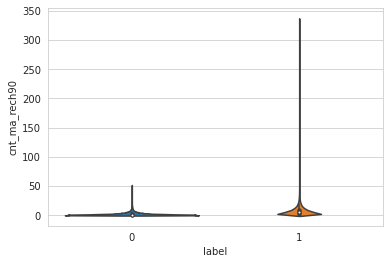

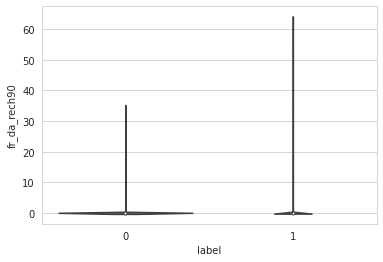

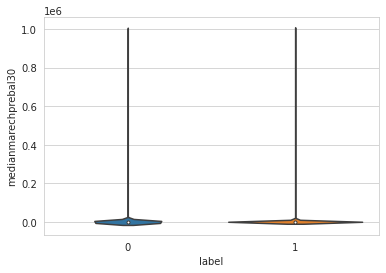

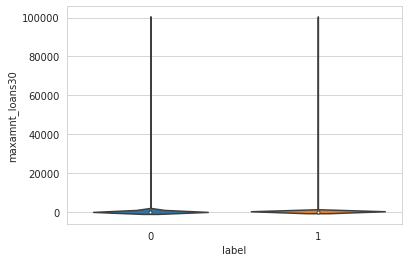

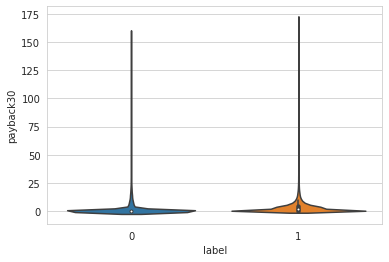

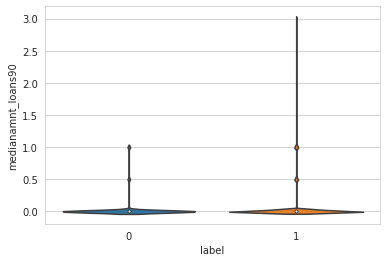

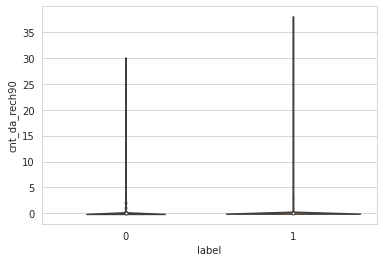

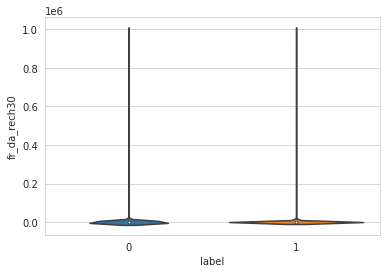

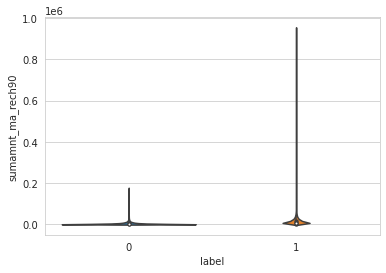

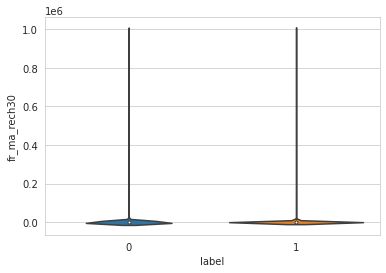

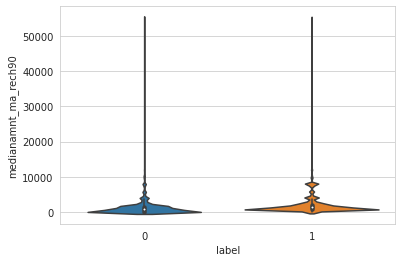

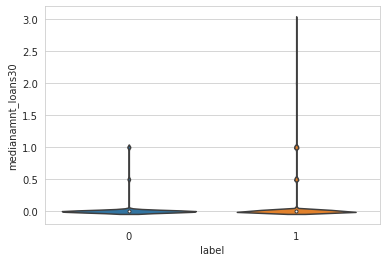

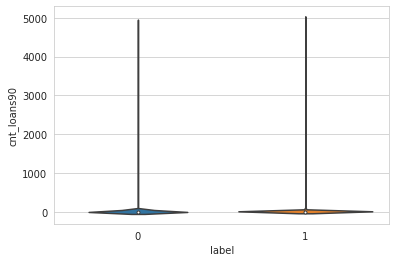

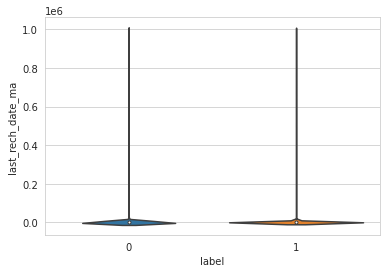

In [21]:
def outliers(column):
  sns.violinplot(x='label',y=column, data=customer_data)
  plt.show()

for i in numerical_column_eda:
  outliers(i)

So by this we can see that many features have **outliers**. We will deal with it in next few codes

**Preprocessing**

In [22]:
customer_data['pcircle'].unique()

array(['UPW'], dtype=object)

Since this column has just on value so we can ignore **pcircle** column

In [ ]:
customer_data_outlier_treatment = customer_data.copy()
# Now we will impute median value in place of outliers as median is most suitable for outliers

for column_value in (numerical_column_eda):
  print(column_value)
  median = customer_data_outlier_treatment[column_value].median()
  #print(customer_data_outlier_treatment.head(5))
  customer_data_outlier_treatment['outliers'] = (np.abs(stats.zscore(customer_data_outlier_treatment[column_value]))>3)
  #customer_data_outlier_treatment['outliers'] 
  customer_data_outlier_treatment.loc[customer_data_outlier_treatment['outliers'] == True, column_value] = np.nan
  customer_data_outlier_treatment[column_value].fillna(median, inplace=True)




In [24]:
from sklearn.preprocessing import StandardScaler
# Now we will remove any undesired value and make it to standard scalar which is  (x-mean)/(std dev) 
for column_value in (numerical_column_eda):
  #print(customer_data_outlier_treatment)
  scaler = StandardScaler()
  scaler.fit(customer_data_outlier_treatment[column_value].values.reshape(-1, 1))
  customer_data_outlier_treatment[column_value]=scaler.transform(customer_data_outlier_treatment[column_value].values.reshape(-1, 1))
  customer_data_outlier_treatment

In [25]:
customer_data_outlier_treatment

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,outliers
0,1,0,21408I70789,-0.768059,-0.216023,-0.252675,-0.674190,-0.662715,-0.411535,-0.132237,-0.175351,-0.493796,3.152658,-0.527507,-0.082293,-0.255348,-0.675496,1.412920,-0.663103,-0.111284,-0.534888,-0.020196,-0.040593,-0.142529,-0.023815,-0.270200,-0.329433,-0.022824,-0.179438,-0.419246,-0.462174,-0.381303,-0.166717,6.378526,5.005246,UPW,2016-07-20,False
1,2,1,76462I70374,0.117088,1.176840,0.956371,0.477238,0.209458,1.460400,-0.132237,2.104111,-0.796844,-0.715881,-0.144450,2.415400,-0.097887,-0.859682,-0.635914,-0.430578,2.388021,-0.113537,-0.020196,-0.040593,-0.142529,-0.023815,-0.774956,-0.329433,0.008803,-0.179438,-0.668143,-0.462174,2.622586,-0.166717,-0.607027,-0.626448,UPW,2016-08-10,False
2,3,1,17943I70372,-0.238982,-0.470578,-0.475164,-0.448624,-0.500031,-0.307539,-0.132237,-0.175351,-0.796844,-0.715881,-0.745124,-0.082293,-0.082359,-0.859682,-0.635914,-0.795202,-0.111284,-0.071984,-0.020196,-0.040593,-0.142529,-0.023815,-0.774956,-0.790588,-0.022824,-0.179438,-0.668143,-0.768359,-0.381303,-0.166717,-0.607027,-0.626448,UPW,2016-08-19,False
3,4,1,55773I70781,-0.830422,-0.682078,-0.658900,-0.694329,-0.688315,3.644326,-0.132237,-0.493016,-1.099891,-0.715881,-0.962740,-0.987177,-0.277405,-0.859682,-0.635914,-0.846016,-0.459586,-0.574237,-0.020196,-0.040593,-0.142529,-0.023815,-0.270200,-0.329433,-0.022824,-0.179438,-0.419246,-0.462174,-0.381303,-0.166717,-0.607027,-0.626448,UPW,2016-06-06,False
4,5,1,03813I82730,0.589837,-0.662201,-0.641633,-0.382688,-0.449505,-0.203543,-0.132237,0.237828,1.021442,-0.347449,1.869390,0.370443,-0.192117,0.429621,-0.440787,1.089459,0.682398,-0.318467,-0.020196,-0.040593,-0.142529,-0.023815,2.253578,1.976341,-0.022824,-0.179438,0.825241,1.068748,-0.381303,-0.166717,-0.044971,-0.173324,UPW,2016-06-22,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,-0.502515,-0.662008,-0.641465,-0.385909,-0.451973,-0.515532,-0.132237,1.170970,-0.190749,-0.347449,0.508401,0.881388,-0.007393,-0.491310,-0.440787,-0.034282,0.853020,0.128618,-0.020196,-0.040593,-0.142529,-0.023815,-0.270200,-0.329433,-0.022824,-0.179438,-0.419246,-0.462174,-0.381303,-0.166717,-0.366146,-0.432252,UPW,2016-06-17,False
209589,209590,1,95583I84455,0.847335,-0.679665,-0.656804,-0.173887,-0.289500,-0.203543,-0.132237,-0.586384,0.112299,-0.531665,-0.525527,-0.532677,0.196976,0.061248,-0.440787,-0.580702,-0.561959,0.285937,-0.020196,-0.040593,-0.142529,-0.023815,0.234555,0.131722,-0.022824,-0.179438,-0.170348,-0.155990,-0.381303,-0.166717,-0.366146,-0.432252,UPW,2016-06-12,False
209590,209591,1,28556I85350,0.722609,1.133997,0.926958,1.197250,1.531761,-0.307539,-0.132237,-0.175351,0.415347,0.757848,0.357101,-0.082293,-0.127033,0.982179,-0.148096,0.668528,-0.111284,-0.223006,-0.020196,-0.040593,-0.142529,-0.023815,0.739311,1.976341,0.008803,-0.179438,0.576344,1.681116,2.622586,-0.166717,0.356498,0.117971,UPW,2016-07-29,False
209591,209592,1,59712I82733,2.169020,1.233100,1.016375,-0.610600,-0.478564,-0.411535,5.273456,-0.586384,0.415347,0.020983,0.755853,-0.532677,0.204916,0.061248,-0.245660,0.612650,0.401462,0.193072,-0.020196,-0.040593,7.016123,-0.023815,-0.270200,0.131722,0.008803,-0.179438,-0.170348,0.150195,2.622586,-0.166717,-0.607027,1.412613,UPW,2016-07-25,False


Now we just imputed outliers to median and now lets go to correlation as we find some correlation between features in above analysis

In [26]:
customer_data_outlier_treatment.corr()
# As in our assumption we are getting some correlation between columns so for that we will use this
# This is done to get correlation between different columns

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,outliers
Unnamed: 0,1.000000,0.000403,0.000870,0.001730,0.001326,-0.003234,-0.002810,-0.001311,0.000757,0.000999,0.002153,-0.002142,0.003068,-0.000093,-0.001461,0.002960,0.001307,0.003243,0.000139,0.002625,-0.001483,-0.001954,-0.002442,0.002002,0.000749,0.001122,-0.003320,-0.001605,0.000473,0.000311,0.002469,-0.003386,-0.000375,0.001033,-0.001643
label,0.000403,1.000000,0.079101,0.187165,0.186813,0.064319,0.076368,-0.095931,0.024785,0.151521,0.269490,0.142551,0.248877,0.161020,0.051687,0.269975,0.104965,0.249381,0.141050,0.116499,0.000352,-0.005564,0.023963,-0.002651,0.214348,0.219281,0.002835,0.031230,0.199496,0.221925,0.099686,0.023182,0.124793,0.116343,0.003212
aon,0.000870,0.079101,1.000000,0.070840,0.070727,0.052245,0.055633,0.023983,-0.005308,0.082349,0.009995,0.043246,0.055588,0.083947,0.023222,0.031612,0.042132,0.071124,0.093085,0.025794,-0.004001,0.006854,0.013564,0.002334,0.041276,0.045256,0.001770,0.002003,0.063167,0.068450,0.037275,-0.001380,0.015491,0.035127,-0.002103
daily_decr30,0.001730,0.187165,0.070840,1.000000,0.899558,0.406363,0.443252,-0.054996,0.056774,0.225832,0.390433,0.077440,0.501900,0.235226,0.047098,0.504748,-0.045099,0.629263,0.207025,0.054213,-0.001134,0.021734,0.023009,0.017203,0.314477,0.375682,0.004284,0.005060,0.457771,0.465919,0.414369,-0.023322,0.116839,0.142638,-0.001538
daily_decr90,0.001326,0.186813,0.070727,0.899558,1.000000,0.400580,0.441550,-0.049362,0.056746,0.217102,0.372561,0.076701,0.474081,0.226547,0.048145,0.505799,-0.044897,0.631901,0.201307,0.054256,-0.001193,0.018827,0.021398,0.016239,0.294473,0.356112,0.004400,0.005002,0.451786,0.461007,0.411226,-0.022655,0.109313,0.137423,-0.001481
rental30,-0.003234,0.064319,0.052245,0.406363,0.400580,1.000000,0.859014,-0.033493,0.019131,0.101066,0.245035,0.050147,0.269936,0.110071,0.028528,0.309520,-0.034696,0.319281,0.089309,0.014976,-0.003455,0.055088,-0.008389,0.029774,0.188343,0.222610,0.002928,-0.001766,0.291480,0.283812,0.260915,-0.019192,0.120878,0.145930,0.000465
rental90,-0.002810,0.076368,0.055633,0.443252,0.441550,0.859014,1.000000,-0.020036,0.024694,0.100757,0.242588,0.056108,0.265249,0.106536,0.026291,0.330380,-0.033974,0.343934,0.088483,0.013139,-0.002931,0.050962,-0.006677,0.025150,0.181422,0.221160,0.001566,-0.001251,0.310233,0.300110,0.285714,-0.020130,0.119075,0.155579,-0.000944
last_rech_date_ma,-0.001311,-0.095931,0.023983,-0.054996,-0.049362,-0.033493,-0.020036,1.000000,0.027524,0.207291,-0.258178,-0.140312,-0.168762,0.013887,0.009320,-0.175794,0.006144,-0.086181,0.197280,0.071424,0.000505,0.005655,0.025012,-0.000182,-0.207480,-0.199873,-0.003367,-0.003480,-0.166185,-0.164731,-0.026719,0.008037,-0.142349,-0.093134,-0.021791
last_rech_date_da,0.000757,0.024785,-0.005308,0.056774,0.056746,0.019131,0.024694,0.027524,1.000000,0.022029,0.010292,0.016582,0.014748,0.016241,0.006812,0.023512,0.003068,0.028078,0.017414,0.015011,-0.002441,0.060809,0.653712,0.054237,-0.001047,0.006371,-0.001205,0.004488,0.004461,0.013368,0.039295,0.001566,0.000446,0.021568,0.002048
last_rech_amt_ma,0.000999,0.151521,0.082349,0.225832,0.217102,0.101066,0.100757,0.207291,0.022029,1.000000,0.031652,0.103918,0.388656,0.772790,0.095937,0.057576,0.126117,0.369503,0.782017,0.178100,-0.002877,0.006967,0.019845,0.003110,0.007925,0.038258,0.002607,0.031998,0.011583,0.050941,0.167495,0.029909,-0.023028,0.000067,-0.000391


In [27]:
#Now we will remove remove all the correlated features which have more than .80 threshold value

correlated_features = set()
matrix = customer_data_outlier_treatment.corr()
for i in range(len(matrix.columns)):
    for j in range(i):
        if abs(matrix.iloc[i, j]) > 0.8:
            colname = matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)
customer_data_corr_features = customer_data_outlier_treatment.drop(correlated_features,axis = 1)
customer_data_corr_features = customer_data_corr_features.drop(['outliers','pdate','pcircle','Unnamed: 0','msisdn'],axis = 1)
customer_data_corr_features.columns


{'rental90', 'medianamnt_ma_rech90', 'amnt_loans30', 'daily_decr90'}


Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [49]:
print('correlated features are - {}\n'.format(correlated_features))

correlated features are - {'rental90', 'medianamnt_ma_rech90', 'amnt_loans30', 'daily_decr90'}



Now we will removed all the unwanted and correlated columns from the dataset. Now lets take a look at each feature after preprocessing

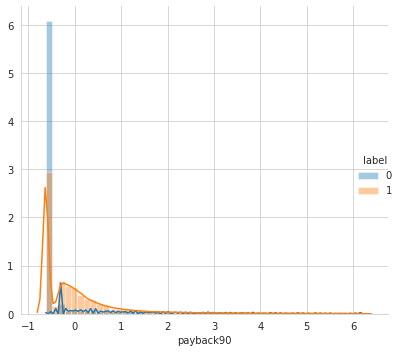

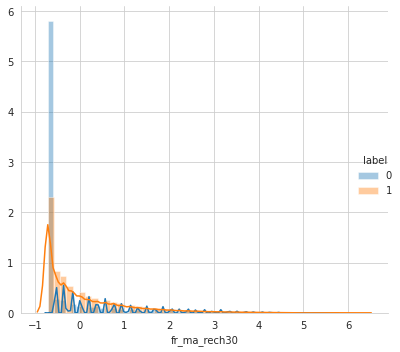

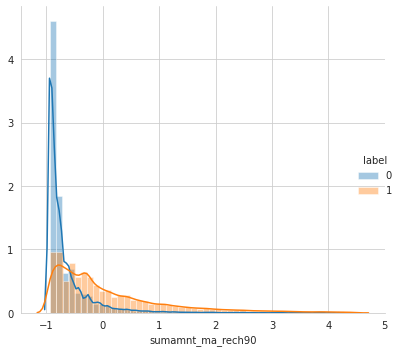

In [ ]:
corr_columns = list(set(customer_data_corr_features.columns) - (set(['Unnamed: 0','label','pdate','pcircle','msisdn'])))
for column_to_chart in corr_columns:
  sns.FacetGrid(customer_data_corr_features, hue="label", size=5).map(sns.distplot, column_to_chart).add_legend();
  plt.tight_layout()
  plt.show();

Now if we see each plot then by on the basis some features we can differentiate the data in between the label 1 and label 0 which will help in applying any model on the data to predict the labels

**Applying ML Models**

In [32]:
# Getting X and Y datasets
X=customer_data_corr_features.drop(['label'],axis = 1)
Y=customer_data_corr_features['label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,  stratify=Y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140427, 28)
(69166, 28)
(140427,)
(69166,)


In [34]:
X_train.columns

Index(['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

We are now building randomsearch function to get best **hyperparameters** for our data. We will use this for all of the model we use for dataset




In [35]:
def randomsearch(param, classifier,x_train,y_train):

  classifier_cv = RandomizedSearchCV(classifier, param, cv=5,scoring='roc_auc', return_train_score=True)

# Fit it to the data
  classifier_cv.fit(x_train, y_train)

# Print the tuned parameters and score
  print("Tuned Parameters: {}".format(classifier_cv.best_params_))
  print("Best score is {}".format(classifier_cv.best_score_))
  return classifier_cv

Now function for ROC-AUC curve is now required for better clarification of the data.

In [36]:
def roc_auc_plot(tree_cv,param):
  results = pd.DataFrame.from_dict(tree_cv.cv_results_)
  print(results.head(5))
  results = results.sort_values([param])

  train_auc= results['mean_score_time']
  train_auc_std= results['std_score_time']
  cv_auc = results['mean_test_score'] 
  cv_auc_std= results['std_test_score']
  K =  results[param]

  plt.plot(K, train_auc, label='Train AUC')

  plt.plot(K, cv_auc, label='CV AUC')

  plt.scatter(K, train_auc, label='Train AUC points')
  plt.scatter(K, cv_auc, label='CV AUC points')


  plt.legend()
  plt.xlabel("K: hyperparameter")
  plt.ylabel("AUC")
  plt.title("Hyper parameter Vs AUC plot")
  plt.grid()
  plt.show()
    

Now the function for Accuracy with other different parameters like precision and recall

In [37]:
# we will pick a threshold that will give the least fpr

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


def accuracy(tr_thresholds,train_fpr,train_tpr,y_train,y_test,y_train_pred,y_test_pred):
  best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
  print("Train confusion matrix")
  print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
  print("Test confusion matrix")
  print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

  
  print(classification_report(y_test,  predict_with_best_t(y_test_pred, best_t)))

  conf_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

  tn = conf_matrix[0,0]  
  tp = conf_matrix[1,1]  
  fp = conf_matrix[0,1]  
  fn = conf_matrix[1,0]  

  accuracy = (tp+tn)/(tp+fn+fp+tn)
  precision = tp / (tp+fp)
  recall = tp / (tp+fn) 
  f1 = 2*precision*recall / (precision+recall)

  print('Accuracy =',accuracy)
  print('Precision =', precision)
  print('Recall =', recall)
  print('F1 Score =', f1)

Now batch predict is used here to predict the data for each data point after training it on the classifier

In [38]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])    
    return y_data_pred

Let's Start to make first model, we will try different model on the basis of data.

**Decision Tree** - 
There are so many features in the dataset so we can try **decision tree** because it selects relevant features by using **Infromation Gain and Entropy** so we did not need to do PCA here.

Tuned Parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 8, 'min_samples_split': 500}
Best score is 0.8646596918759301
   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.471717      0.014629  ...          0.986109         0.000469
1       0.373882      0.020751  ...          0.877476         0.003838
2       0.718953      0.035246  ...          0.896862         0.000617
3       0.522043      0.030399  ...          0.932559         0.001288
4       0.175321      0.016857  ...          0.829942         0.003210

[5 rows x 24 columns]


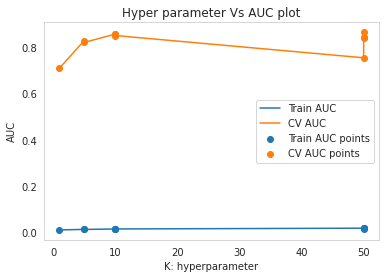

In [39]:
param_dist = {"max_depth": [1,5,10,50],
              "max_features": randint(1, 9),
              "criterion": ["gini", "entropy"],
            "min_samples_split": [5, 10, 100, 500]
             }
cv_tree = randomsearch(param_dist,DecisionTreeClassifier(),X_train,y_train)
auc_roc_plot = roc_auc_plot(cv_tree,'param_max_depth')

# Appliying random search to get best hyperparameter

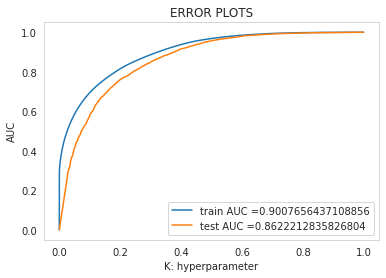

In [40]:
# Applying best hyperparamters for test dataset prediction
criterion_opt = 'entropy'
max_depth_opt = 50
max_features_opt = 8
min_samples_split_opt = 500

DTC = DecisionTreeClassifier(criterion= criterion_opt, max_depth=max_depth_opt, min_samples_split=min_samples_split_opt,max_features=max_features_opt)

DTC.fit(X_train, y_train)

y_train_pred = batch_predict(DTC, X_train)    
y_test_pred = batch_predict(DTC, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [41]:
accuracy(tr_thresholds,train_fpr,train_tpr,y_train,y_test,y_train_pred,y_test_pred)


the maximum value of tpr*(1-fpr) 0.6525512236775499 for threshold 0.874
Train confusion matrix
[[14235  3294]
 [24143 98755]]
Test confusion matrix
[[ 6538  2095]
 [12132 48401]]
              precision    recall  f1-score   support

           0       0.35      0.76      0.48      8633
           1       0.96      0.80      0.87     60533

    accuracy                           0.79     69166
   macro avg       0.65      0.78      0.68     69166
weighted avg       0.88      0.79      0.82     69166

Accuracy = 0.7943064511465171
Precision = 0.9585115652724968
Recall = 0.7995803941651661
F1 Score = 0.8718623062443145


It gives accuracy of 79%.It maybe because decision tree is sensitive to data. We are found low overfitting values

**XgBoost** - Now we can try XgBoost here as it required less feature engineering and it is less prone to overfitting as it try to additive residual which try to reduce total loss in the model

Tuned Decision Tree Parameters: {'max_depth': 10}
Best score is 0.8999067715935949
   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       5.258921      0.049314  ...          0.855184         0.000604
1      18.030495      0.111728  ...          0.904825         0.000735
2      41.800176      1.218072  ...          0.966176         0.000607
3     178.636223      1.707001  ...          0.999952         0.000009

[4 rows x 21 columns]


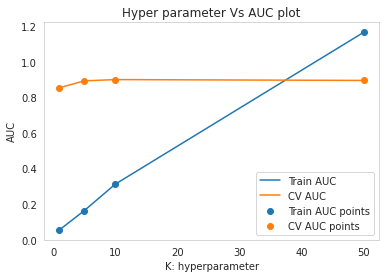

In [ ]:
param = {"max_depth": [1,5,10,50]
             }
cv_tree = randomsearch(param,xg.XGBClassifier(),X_train,y_train)
auc_roc_plot = roc_auc_plot(cv_tree,'param_max_depth')

# Appliying random search to get best hyperparameter

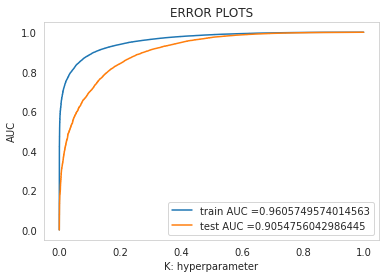

In [ ]:
# Applying best hyperparamters for test dataset prediction
max_depth_opt = 10

tree =xg.XGBClassifier(max_depth=max_depth_opt)

tree.fit(X_train, y_train)

y_train_pred = batch_predict(tree, X_train)    
y_test_pred = batch_predict(tree, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
accuracy(tr_thresholds,train_fpr,train_tpr,y_train,y_test,y_train_pred,y_test_pred)


the maximum value of tpr*(1-fpr) 0.7991085121460324 for threshold 0.854
Train confusion matrix
[[ 16011   1518]
 [ 15378 107520]]
Test confusion matrix
[[ 6695  1938]
 [ 8265 52268]]
              precision    recall  f1-score   support

           0       0.45      0.78      0.57      8633
           1       0.96      0.86      0.91     60533

    accuracy                           0.85     69166
   macro avg       0.71      0.82      0.74     69166
weighted avg       0.90      0.85      0.87     69166

Accuracy = 0.8524853251597606
Precision = 0.9642475002767221
Recall = 0.8634629045314126
F1 Score = 0.9110764430577223


*Conclusion* -  It gives 85% accuracy because it not needed to do feature selection as it have all advantages of decision tree with the another important thing that it reduces additive error in each iteration.

**RandomForest** - Since this algorithm work well on imbalanced dataset and it has littlie impact of outliers.

Tuned Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_split': 500, 'n_estimators': 150}
Best score is 0.8799992753715152
   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      13.849212      0.137015  ...          0.855528         0.000678
1      24.373558      0.368901  ...          0.881210         0.000419
2       8.881084      0.118919  ...          0.844394         0.000941
3      37.827511      0.368610  ...          0.859932         0.000489
4       1.396186      0.041107  ...          0.805353         0.002199

[5 rows x 25 columns]


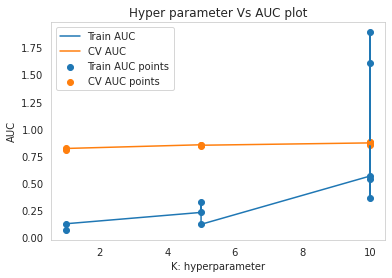

In [43]:
param_dist = {"max_depth": [1,5,10,50],
              "max_features": randint(1, 9),
              "n_estimators": [10, 50, 100, 150, 500],
              "criterion": ["gini", "entropy"],
            "min_samples_split": [5, 10, 100, 500]
             }
cv_tree = randomsearch(param_dist,RandomForestClassifier(),X_train,y_train)
auc_roc_plot = roc_auc_plot(cv_tree,'param_max_depth')

# Appliying random search to get best hyperparameter

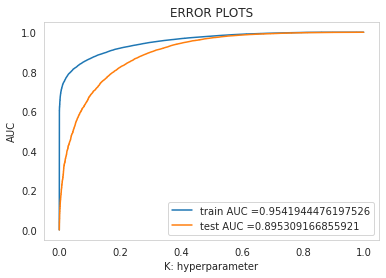

In [ ]:
# Applying best hyperparamters for test dataset prediction
n_estimators = 150
criterion_opt = 'gini'
max_depth_opt = 50
max_features_opt = 8
min_samples_split_opt = 500

rfc = RandomForestClassifier(criterion= criterion_opt, max_depth=max_depth_opt, min_samples_split=min_samples_split_opt,max_features=max_features_opt)

rfc.fit(X_train, y_train)


y_train_pred = batch_predict(rfc, X_train)    
y_test_pred = batch_predict(rfc, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
accuracy(tr_thresholds,train_fpr,train_tpr,y_train,y_test,y_train_pred,y_test_pred)

the maximum value of tpr*(1-fpr) 0.7824555051304259 for threshold 0.86
Train confusion matrix
[[ 16157   1372]
 [ 18570 104328]]
Test confusion matrix
[[ 6837  1796]
 [10279 50254]]
              precision    recall  f1-score   support

           0       0.40      0.79      0.53      8633
           1       0.97      0.83      0.89     60533

    accuracy                           0.83     69166
   macro avg       0.68      0.81      0.71     69166
weighted avg       0.89      0.83      0.85     69166

Accuracy = 0.8254200040482318
Precision = 0.965494716618636
Recall = 0.8301917962103316
F1 Score = 0.8927457964346304


*Observation* - So in this model we are getting 83% accuracy which is low then XgBoost because Xgboost reduces the error in each iteration but it only column and row sampling

**Logistic Regression** - We can try this as we have binary classification. 

In [ ]:
param_dist = {"penalty": ['l1','l2'],
             "C" : [0.0001,0.001,0.01,0.1,1,10] 
             }
cv_tree = randomsearch(param_dist,LogisticRegression(),X_train,y_train)
# Appliying random search to get best hyperparameter

Tuned Decision Tree Parameters: {'penalty': 'l2', 'C': 10}
Best score is 0.833347921545618


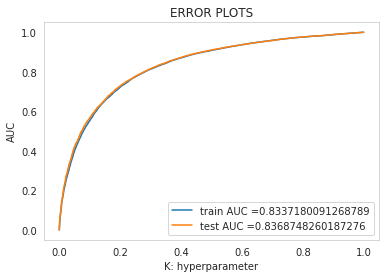

In [ ]:
# Applying best hyperparamters for test dataset prediction
penalty_opt = 'l2'
C_opt = 10


lr = LogisticRegression(penalty= penalty_opt, C = C_opt)

lr.fit(X_train, y_train)

y_train_pred = batch_predict(lr, X_train)    
y_test_pred = batch_predict(lr, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
accuracy(tr_thresholds,train_fpr,train_tpr,y_train,y_test,y_train_pred,y_test_pred)

the maximum value of tpr*(1-fpr) 0.5825569661741155 for threshold 0.851
Train confusion matrix
[[13327  4202]
 [28729 94169]]
Test confusion matrix
[[ 6560  2073]
 [14087 46446]]
              precision    recall  f1-score   support

           0       0.32      0.76      0.45      8633
           1       0.96      0.77      0.85     60533

    accuracy                           0.77     69166
   macro avg       0.64      0.76      0.65     69166
weighted avg       0.88      0.77      0.80     69166

Accuracy = 0.7663591938235549
Precision = 0.9572744697953379
Recall = 0.7672839608147622
F1 Score = 0.851813813593515


*Observation* - So in this model we are getting 77% accuracy maybe because of correlated features. We only removed correlated features of more than 0.80 value so maybe that's why it is low. Also it is not overfitted as we have almost same AUC value for both train and test data

In [48]:
x = PrettyTable()
x.field_names = ["Model Name", "Accuracy"]

x.add_row(["Decision Tree", '79%'])
x.add_row(["XgBoost", '85%'])
x.add_row(["Random Forest",'83%'])
x.add_row(["Logistic Regression",'77%'])
print(x)

+---------------------+----------+
|      Model Name     | Accuracy |
+---------------------+----------+
|    Decision Tree    |   79%    |
|       XgBoost       |   85%    |
|    Random Forest    |   83%    |
| Logistic Regression |   77%    |
+---------------------+----------+


Now after above table we can say that XgBoost will be the best model to apply on the data which we applied above which has 85% accuracy and f2 score of 91% . It also has less overfitting to the data as we are getting almost same accuracy value for both train and test data